In [18]:
%run ../../../utils/commonImports.py
%run ../../../utils/tradingImports.py
%matplotlib inline

from base import supres
from exputils import *

# Load data

In [19]:
# dropbox_dir = 'D:\\Dropbox\\My work\\krypl-project'
dropbox_dir = '/Users/david.vesely/Dropbox/My work/krypl-project'

pairs = read_tsv('selected-pairs.tsv', header=None)[0].tolist()
supports = read_tsv('featured.tsv')
ohlc_supports_dict = load_model('ohlc_featured.pkl')
data_dict = {p: read_all(p, dropbox_dir) for p in pairs}

In [20]:
features = ['max_profit_consolidated', 'support', 'change_1', 'change_2', 'change_3']
window_sizes = [4]
shifts = [1, 2, 3]

DAY = 48
max_hold_time = 5 * DAY
stop_loss = 0.05
fee = 0.0025

# Split

In [21]:
train_query = 'date < "2017"'
validation_query = '"2017" < date <= "2018"'
test_query = 'date >= "2018"'

In [22]:
train = supports.query(train_query)
validation = supports.query(validation_query)
test = supports.query(test_query)

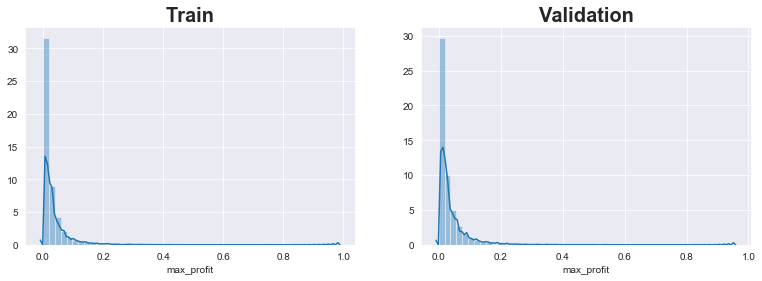

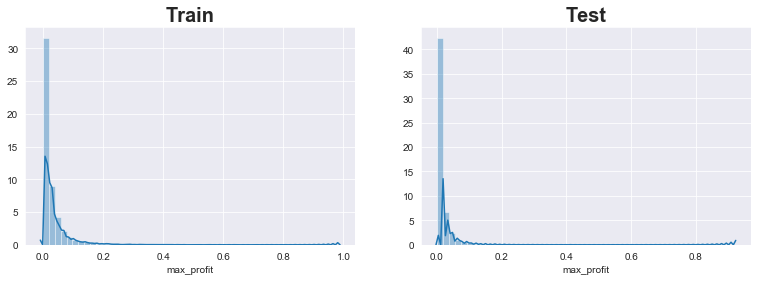

In [23]:
def plot_bucketed(df, ax, title):
    bucketed = (df['max_profit'] * 100).apply(int) / 100
    sns.distplot(bucketed[bucketed < 1], ax=ax)
    ax.set_title(title, fontproperties=title_font)

f, axes = plt.subplots(1, 2, figsize=[13, 4])
plot_bucketed(train, axes[0], 'Train')
plot_bucketed(validation, axes[1], 'Validation')

f, axes = plt.subplots(1, 2, figsize=[13, 4])
plot_bucketed(train, axes[0], 'Train')
plot_bucketed(test, axes[1], 'Test')

In [24]:
write_tsv(train, 'train.tsv')
write_tsv(validation, 'validation.tsv')
write_tsv(test, 'test.tsv')

# Split ohlc dicts

In [25]:
def filter_dict(query):
    def data(pair, w):
        d = data_dict[pair]
        d[features] = ohlc_supports_dict[pair][w]
        return d.query(query)[features]
    
    return {p: {w: data(p, w) for w in window_sizes} for p in pairs}

ohlc_train = filter_dict(train_query)
ohlc_val = filter_dict(validation_query)
ohlc_test = filter_dict(test_query)

In [26]:
save_model(ohlc_train, 'ohlc_featured_train.pkl')
save_model(ohlc_val, 'ohlc_featured_val.pkl')
save_model(ohlc_test, 'ohlc_featured_test.pkl')